In [14]:
from physics.hstar import gghzz, c6
from physics.hzz import angles, zpair
from physics.simulation import msq


import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
SAMPLE_DIR = '..'

In [16]:
sample_sig = gghzz.Process(msq.Component.SIG, (0.1, os.path.join(SAMPLE_DIR, 'ggZZ2e2m_sig.csv'), 500000))

In [17]:
c6_values = [-10,10]
c6_mod = c6.Modifier(baseline = msq.Component.SIG, c6_values = [-5,-1,0,1,5])
c6_weights, c6_prob = c6_mod.modify(sample=sample_sig, c6=c6_values)

In [18]:
print((np.sum(c6_weights.T[0]>np.array(sample_sig.events.weights)).astype(int))/c6_weights.shape[0])

0.61469


In [19]:
print((np.sum(c6_weights.T[0]/np.array(sample_sig.events.weights)>1).astype(int))/c6_weights.shape[0])

0.61469


In [20]:
print(sample_sig.events.weights)

0         3.890228e-08
1         3.102925e-07
2         3.090272e-07
3         4.742878e-08
4         2.015766e-07
              ...     
499995    3.196929e-08
499996    5.261670e-07
499997    1.436328e-07
499998    3.181592e-07
499999    1.433379e-07
Name: wt, Length: 500000, dtype: float64


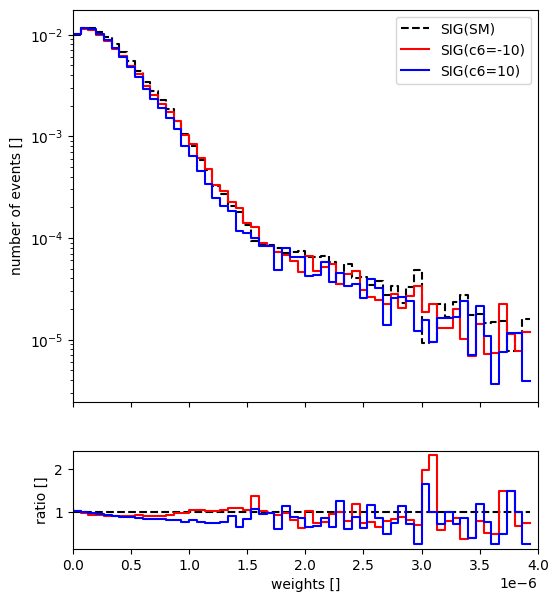

In [21]:
BINS = 60

hist_sm_wt, bins = np.histogram(sample_sig.events.weights, bins=BINS, range=(np.min(sample_sig.events.weights), np.max(sample_sig.events.weights)), weights=sample_sig.events.weights)
hist_c6_wt_1, bins = np.histogram(c6_weights.T[0], bins=BINS, range=(np.min(c6_weights.T[0]), np.max(c6_weights.T[0])), weights=c6_weights.T[0])
hist_c6_wt_2, bins = np.histogram(c6_weights.T[1], bins=BINS, range=(np.min(c6_weights.T[1]), np.max(c6_weights.T[1])), weights=c6_weights.T[1])

hist_sm_wt, bins = np.histogram(sample_sig.events.weights, bins=BINS, range=(0, 4e-6), weights=sample_sig.events.weights)
hist_c6_wt_1, bins = np.histogram(c6_weights.T[0], bins=BINS, range=(0, 4e-6), weights=c6_weights.T[0])
hist_c6_wt_2, bins = np.histogram(c6_weights.T[1], bins=BINS, range=(0, 4e-6), weights=c6_weights.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm_wt, color='k', linestyle='--', label='SIG(SM)')
ax1.step(bins[:-1], hist_c6_wt_1, color='r', label=f'SIG(c6={c6_values[0]})')
ax1.step(bins[:-1], hist_c6_wt_2, color='b', label=f'SIG(c6={c6_values[1]})')

ax1.set_yscale('log')
ax1.set_ylabel('number of events []')
ax1.legend()
ax1.set_xbound(0,4e-6)

ax2.step(bins[:-1], hist_sm_wt/hist_sm_wt, color='k', linestyle='--', label='SIG(SM)')
ax2.step(bins[:-1], hist_c6_wt_1/hist_sm_wt, color='r', label=f'SIG(c6={c6_values[0]})')
ax2.step(bins[:-1], hist_c6_wt_2/hist_sm_wt, color='b', label=f'SIG(c6={c6_values[1]})')

ax2.set_xlabel('weights []')
ax2.set_ylabel('ratio []')
ax2.set_xbound(0,4e-6)

plt.show()

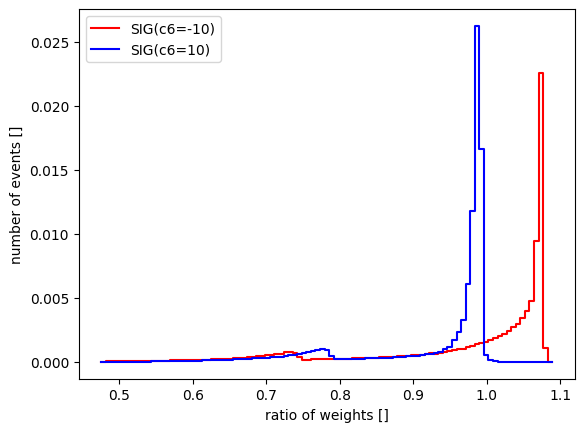

In [25]:
BINS = 100

hist_c6_wt_1, bins = np.histogram(c6_weights.T[0]/sample_sig.events.weights, bins=BINS, range=(np.min(c6_weights.T[0]/sample_sig.events.weights), np.max(c6_weights.T[0]/sample_sig.events.weights)), weights=c6_weights.T[0])
hist_c6_wt_2, bins = np.histogram(c6_weights.T[1]/sample_sig.events.weights, bins=BINS, range=(np.min(c6_weights.T[1]/sample_sig.events.weights), np.max(c6_weights.T[1]/sample_sig.events.weights)), weights=c6_weights.T[1])

plt.step(bins[:-1], hist_c6_wt_1, color='r', label='SIG(c6=-10)')
plt.step(bins[:-1], hist_c6_wt_2, color='b', label='SIG(c6=10)')

plt.xlabel('ratio of weights []')
plt.ylabel('number of events []')
plt.legend()

plt.show()

/tmp/ipykernel_5019/1292827433.py:20: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_sm_pb/hist_sm_pb, color='k', linestyle='--', label='SIG(SM)')
/tmp/ipykernel_5019/1292827433.py:21: RuntimeWarning: divide by zero encountered in divide
  ax2.step(bins[:-1], hist_c6_pb_1/hist_sm_pb, color='r', label='SIG(c6=-10)')
/tmp/ipykernel_5019/1292827433.py:21: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_pb_1/hist_sm_pb, color='r', label='SIG(c6=-10)')
/tmp/ipykernel_5019/1292827433.py:22: RuntimeWarning: divide by zero encountered in divide
  ax2.step(bins[:-1], hist_c6_pb_2/hist_sm_pb, color='b', label='SIG(c6=10)')
/tmp/ipykernel_5019/1292827433.py:22: RuntimeWarning: invalid value encountered in divide
  ax2.step(bins[:-1], hist_c6_pb_2/hist_sm_pb, color='b', label='SIG(c6=10)')


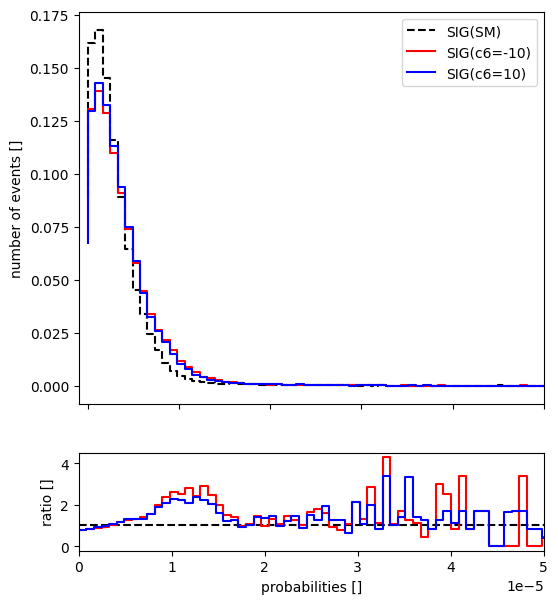

In [23]:
BINS = 100

hist_sm_pb, bins = np.histogram(sample_sig.events.probabilities, bins=BINS, range=(np.min(sample_sig.events.probabilities), np.max(sample_sig.events.probabilities)), weights=sample_sig.events.probabilities)
hist_c6_pb_1, bins = np.histogram(c6_prob.T[0], bins=BINS, range=(np.min(c6_prob.T[0]), np.max(c6_prob.T[0])), weights=c6_prob.T[0])
hist_c6_pb_2, bins = np.histogram(c6_prob.T[1], bins=BINS, range=(np.min(c6_prob.T[1]), np.max(c6_prob.T[1])), weights=c6_prob.T[1])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist_sm_pb, color='k', linestyle='--', label='SIG(SM)')
ax1.step(bins[:-1], hist_c6_pb_1, color='r', label='SIG(c6=-10)')
ax1.step(bins[:-1], hist_c6_pb_2, color='b', label='SIG(c6=10)')

#plt.yscale('log')
ax1.set_ylabel('number of events []')
ax1.legend()
ax1.set_xbound(-1e-6,5e-5)

ax2.step(bins[:-1], hist_sm_pb/hist_sm_pb, color='k', linestyle='--', label='SIG(SM)')
ax2.step(bins[:-1], hist_c6_pb_1/hist_sm_pb, color='r', label='SIG(c6=-10)')
ax2.step(bins[:-1], hist_c6_pb_2/hist_sm_pb, color='b', label='SIG(c6=10)')

ax2.set_xlabel('probabilities []')
ax2.set_ylabel('ratio []')
ax2.set_xbound(0,5e-5)

plt.show()